In [158]:
#import the necessary libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import warnings
warnings.filterwarnings("ignore")


In [159]:
#import dataset
data = pd.read_csv(r"C:\Users\Dell\Desktop\Intelligent_Customer_Retention\dataset\churnmodelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [161]:
#checking for null values
data.EstimatedSalary = pd.to_numeric(data.EstimatedSalary, errors='coerce')
data.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [162]:
data["EstimatedSalary"].fillna(data["EstimatedSalary"].median , inplace = True)

data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [163]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["RowNumber"] = le.fit_transform(data["RowNumber"])
data["CustomerId"] = le.fit_transform(data["CustomerId"])
data["Surname"] = le.fit_transform(data["Surname"])
data["CreditScore"] = le.fit_transform(data["CreditScore"])
data["Geography"] = le.fit_transform(data["Geography"])
data["Gender"] = le.fit_transform(data["Gender"])
data["Age"] = le.fit_transform(data["Age"])
data["Tenure"] = le.fit_transform(data["Tenure"])
data["Balance"] = le.fit_transform(data["Balance"])
data["NumOfProducts"] = le.fit_transform(data["NumOfProducts"])
data["HasCrCard"] = le.fit_transform(data["HasCrCard"])
data["IsActiveMember"] = le.fit_transform(data["IsActiveMember"])
data["EstimatedSalary"] = le.fit_transform(data["EstimatedSalary"])
data["Exited"] = le.fit_transform(data["Exited"])

In [164]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,2736,1115,228,0,0,24,2,0,0,1,1,5068,1
1,1,3258,1177,217,2,0,23,1,743,0,0,1,5639,0
2,2,2104,2040,111,0,0,24,8,5793,2,1,0,5707,1
3,3,5435,289,308,0,0,21,1,0,1,0,0,4704,0
4,4,6899,1822,459,2,0,25,2,3696,0,1,1,3925,0


In [165]:
x = data.iloc[:,0:13].values
y = data.iloc[:,13:14].values

In [166]:
x

array([[   0, 2736, 1115, ...,    1,    1, 5068],
       [   1, 3258, 1177, ...,    0,    1, 5639],
       [   2, 2104, 2040, ...,    1,    0, 5707],
       ...,
       [9997,  717, 1570, ...,    0,    1, 2062],
       [9998, 4656, 2345, ...,    1,    0, 4639],
       [9999, 2497, 2751, ...,    1,    0, 1878]], dtype=int64)

In [167]:
y

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

In [168]:
smt = SMOTE()

x_resample, y_resample = smt.fit_resample(x,y)

In [169]:
x_resample

array([[   0, 2736, 1115, ...,    1,    1, 5068],
       [   1, 3258, 1177, ...,    0,    1, 5639],
       [   2, 2104, 2040, ...,    1,    0, 5707],
       ...,
       [6125, 6223, 1802, ...,    0,    0, 8582],
       [3864, 7084, 2069, ...,    1,    0, 1312],
       [4714, 8506, 2399, ...,    1,    0, 8514]], dtype=int64)

In [170]:
y_resample

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [171]:
x.shape, x_resample.shape

((10000, 13), (15926, 13))

In [172]:
y.shape, y_resample.shape

((10000, 1), (15926,))

In [173]:
data.describe()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,4999.50000,1507.774200,259.584600,0.746300,0.545700,20.920600,5.012800,2036.788100,0.530200,0.70550,0.515100,4998.621200,0.203700
std,2886.89568,2886.89568,846.204311,96.496107,0.827529,0.497932,10.482065,2.892174,2125.232536,0.581654,0.45584,0.499797,2886.711202,0.402769
min,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2499.75000,2499.75000,773.750000,193.000000,0.000000,0.000000,14.000000,3.000000,0.000000,0.000000,0.00000,0.000000,2498.750000,0.000000
50%,4999.50000,4999.50000,1542.000000,261.000000,0.000000,1.000000,19.000000,5.000000,1383.500000,0.000000,1.00000,1.000000,4998.500000,0.000000
75%,7499.25000,7499.25000,2238.250000,327.000000,1.000000,1.000000,26.000000,7.000000,3882.250000,1.000000,1.00000,1.000000,7498.250000,0.000000
max,9999.00000,9999.00000,2931.000000,459.000000,2.000000,1.000000,69.000000,10.000000,6381.000000,3.000000,1.00000,1.000000,9998.000000,1.000000


<Axes: xlabel='Gender', ylabel='Age'>

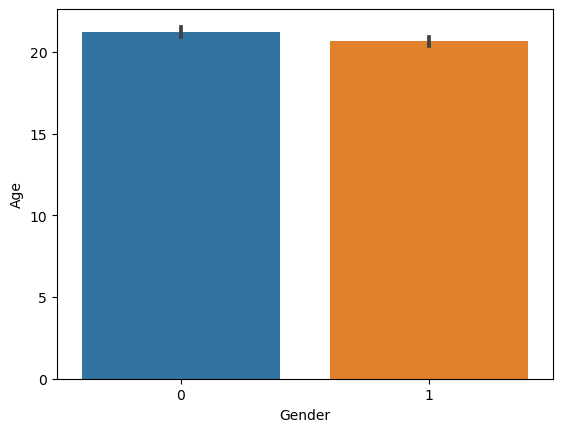

In [174]:
sns.barplot(x="Gender", y="Age",data=data)

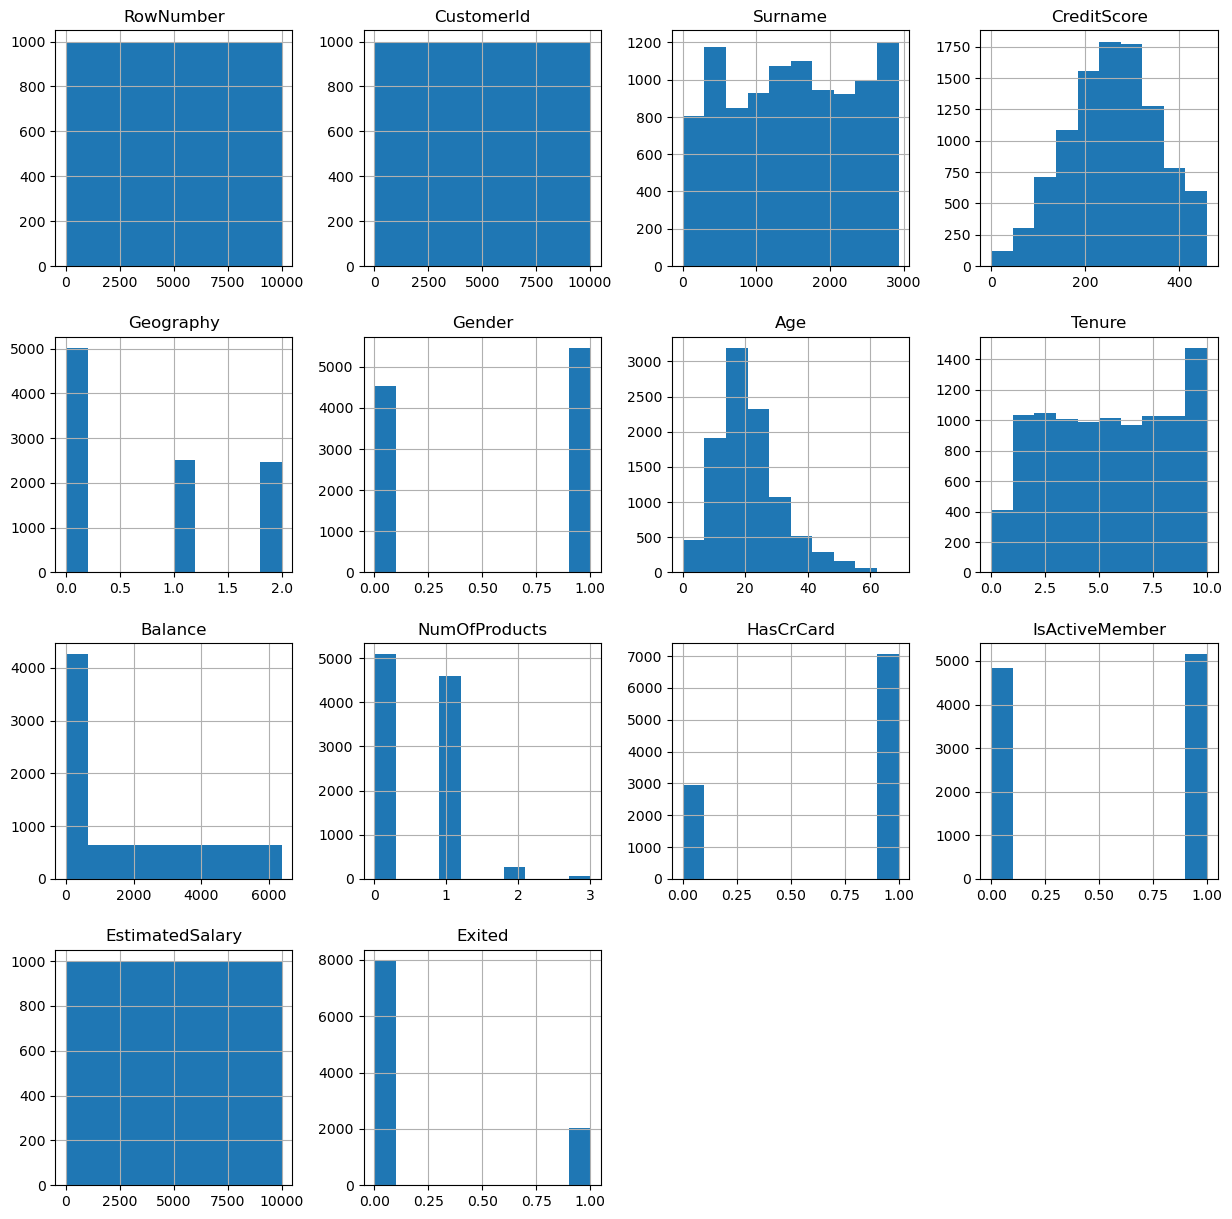

In [175]:
data.hist(figsize=(15,15))
plt.show()

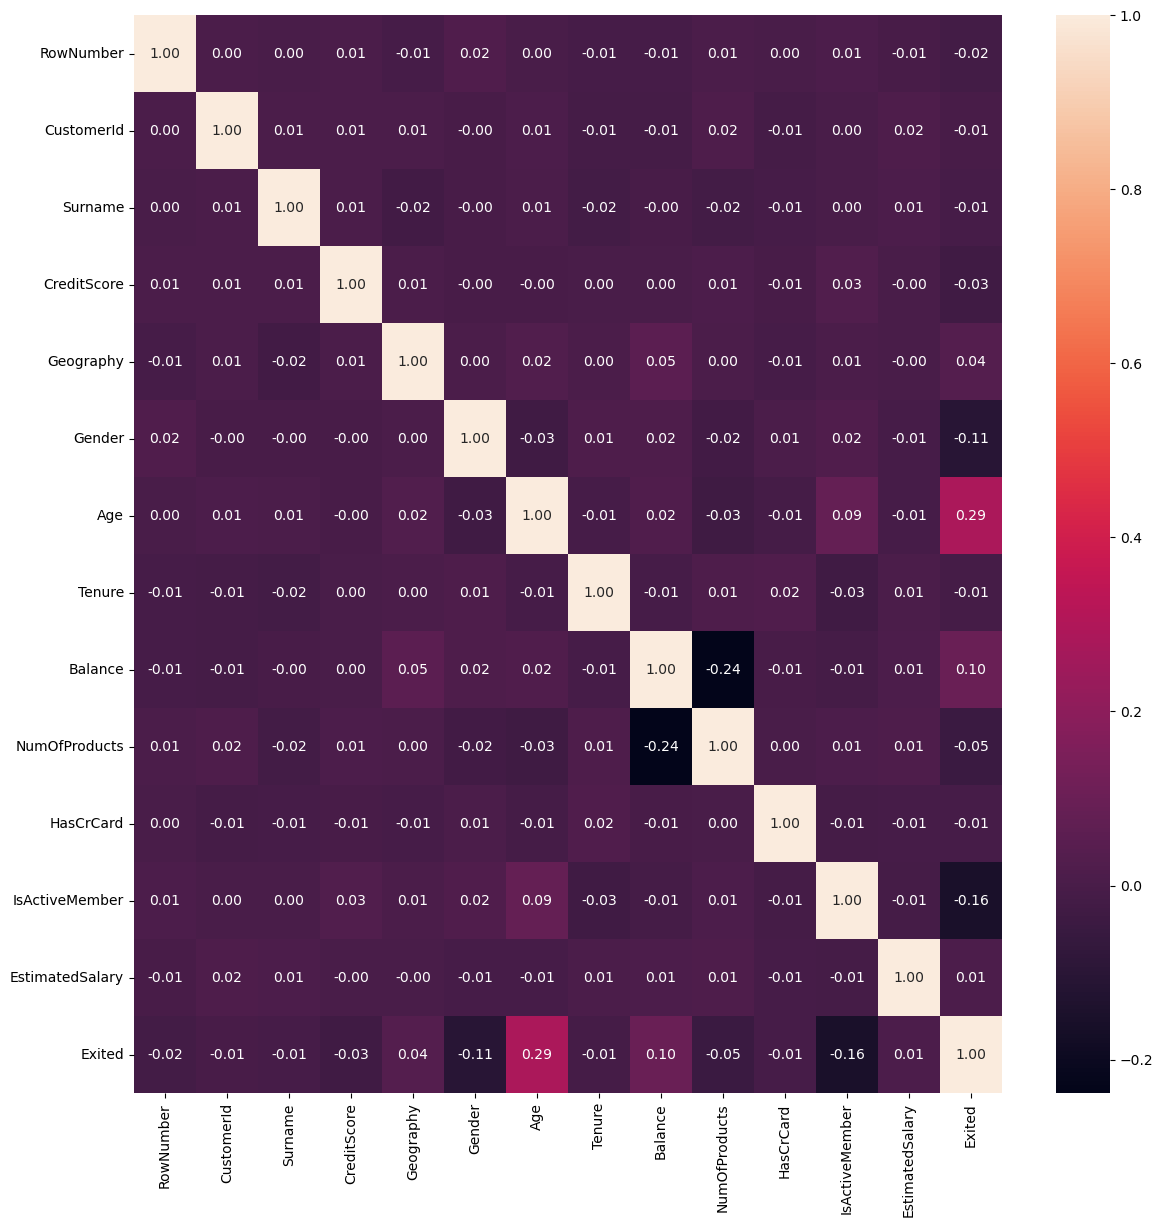

In [176]:
corr_matrix = data.corr()
plt.figure(figsize = (14,14))
sns.heatmap(corr_matrix, annot = True, fmt = '0.2f')
plt.show()


Text(0.5, 0, 'NumOfProducts')

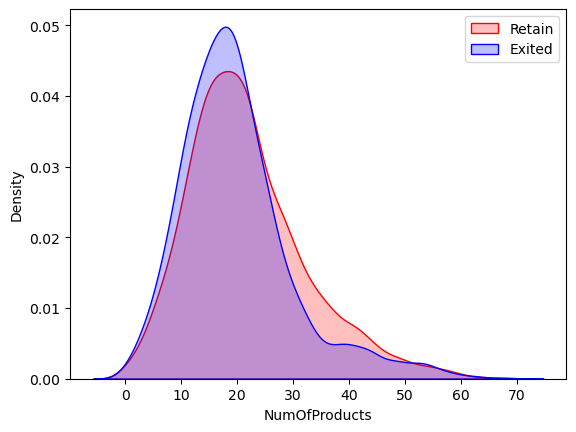

In [177]:
ax = sns.kdeplot(data.Age[(data["NumOfProducts"] == 0)], color = "Red", shade = True)
ax = sns.kdeplot(data.Age[(data["NumOfProducts"] == 1)], color = "Blue", shade = True)

ax.legend(["Retain", "Exited"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("NumOfProducts")

In [178]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_resample,y_resample,test_size = 0.2, random_state = 0)

In [179]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [180]:
x_train.shape

(12740, 13)

In [181]:
x_test.shape

(3186, 13)

In [182]:
#importing and building the logreg model
def logreg(x_train,x_test,y_train,y_test):
    lr = LogisticRegression(random_state=0)
    lr.fit(x_train,y_train)
    y_lr_tr = lr.predict(x_train)
    print(accuracy_score(y_lr_tr,y_train))
    yPred_lr = lr.predict(x_test)
    print(accuracy_score(yPred_lr,y_test))
    print("***Logistic Refression***")
    print("Confusion_Matrix")
    print(confusion_matrix(y_test,yPred_lr))
    print("Classification Report")
    print(classification_report(y_test,yPred_lr))

In [183]:
#printing the train accuracy and test accuracy respectively
logreg(x_train,x_test,y_train,y_test)

0.7702511773940346
0.7793471437539234
***Logistic Refression***
Confusion_Matrix
[[1224  366]
 [ 337 1259]]
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.77      0.78      1590
           1       0.77      0.79      0.78      1596

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186



In [184]:
#importing and building the Decision tree model
def decisionTree(x_train,x_test,y_train,y_test):
    dtc = DecisionTreeClassifier(criterion="entropy",random_state=0)
    dtc.fit(x_train,y_train)
    y_dt_tr = dtc.predict(x_train)
    print(accuracy_score(y_dt_tr,y_train))
    yPred_dt = dtc.predict(x_test)
    print(accuracy_score(yPred_dt,y_test))
    print("***Decision Tree***")
    print("Confusion_Matrix")
    print(confusion_matrix(y_test,yPred_dt))
    print("Classification Report")
    print(classification_report(y_test,yPred_dt))

In [185]:
#printing the train accuracy and test accuracy respectively
decisionTree(x_train,x_test,y_train,y_test)

1.0
0.7897049591964846
***Decision Tree***
Confusion_Matrix
[[1215  375]
 [ 295 1301]]
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1590
           1       0.78      0.82      0.80      1596

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186



In [186]:
#importing and building the random forest model
def RandomForest(x_train,x_test,y_train,y_test):
    rf = RandomForestClassifier(criterion="entropy",n_estimators=10,random_state=0)
    rf.fit(x_train,y_train)
    y_rf_tr = rf.predict(x_train)
    print(accuracy_score(y_rf_tr,y_train))
    yPred_rf = rf.predict(x_test)
    print(accuracy_score(yPred_rf,y_test))
    print("***Random Forest***")
    print("Confusion_Matrix")
    print(confusion_matrix(y_test,yPred_rf))
    print("Classification Report")
    print(classification_report(y_test,yPred_rf))

In [187]:
#printing the train accuracy and test accuracy respectively
RandomForest(x_train,x_test,y_train,y_test)

0.9924646781789639
0.8524795982423101
***Random Forest***
Confusion_Matrix
[[1385  205]
 [ 265 1331]]
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1590
           1       0.87      0.83      0.85      1596

    accuracy                           0.85      3186
   macro avg       0.85      0.85      0.85      3186
weighted avg       0.85      0.85      0.85      3186



In [188]:
#importing and building the KNN model
def KNN(x_train,x_test,y_train,y_test):
    knn = RandomForestClassifier(criterion="entropy",n_estimators=10,random_state=0)
    knn.fit(x_train,y_train)
    y_knn_tr = knn.predict(x_train)
    print(accuracy_score(y_knn_tr,y_train))
    yPred_knn = knn.predict(x_test)
    print(accuracy_score(yPred_knn,y_test))
    print("***KNN***")
    print("Confusion_Matrix")
    print(confusion_matrix(y_test,yPred_knn))
    print("Classification Report")
    print(classification_report(y_test,yPred_knn))

In [189]:
#printing the train accuracy and test accuracy respectively
KNN(x_train,x_test,y_train,y_test)

0.9924646781789639
0.8524795982423101
***KNN***
Confusion_Matrix
[[1385  205]
 [ 265 1331]]
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1590
           1       0.87      0.83      0.85      1596

    accuracy                           0.85      3186
   macro avg       0.85      0.85      0.85      3186
weighted avg       0.85      0.85      0.85      3186



In [190]:
#importing and building the random forest model
def svm(x_train,x_test,y_train,y_test):
    svm = SVC(kernel = "linear")
    svm.fit(x_train,y_train)
    y_svm_tr = svm.predict(x_train)
    print(accuracy_score(y_svm_tr,y_train))
    yPred_svm =  svm.predict(x_test)
    print(accuracy_score(yPred_svm,y_test))
    print("***Support vector Machine***")
    print("Confusion_Matrix")
    print(confusion_matrix(y_test,yPred_svm))
    print("Classification Report")
    print(classification_report(y_test,yPred_svm))

In [191]:
#printing the train accuracy and test accuracy respectively
svm(x_train,x_test,y_train,y_test)

0.7706436420722135
0.775894538606403
***Support vector Machine***
Confusion_Matrix
[[1229  361]
 [ 353 1243]]
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.77      0.77      1590
           1       0.77      0.78      0.78      1596

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186



In [192]:
# Importing the keras libraries and packages
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

In [193]:


# Initialising the ANN

classifier =Sequential([Dense(30, activation='relu', input_dim=(13)),
                        Dense(30, activation='relu'),
                        Dense(1, activation='sigmoid')])

# compiling the ANN    
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

                  

# Fitting the ANN to the Training set 

model_history = classifier.fit(x_train,y_train, batch_size=256, validation_split=0.33, epochs=100, shuffle=True)


Epoch 1/100
34/34 [==============================] - 3s 43ms/step - loss: 0.7066 - accuracy: 0.5289 - val_loss: 0.6229 - val_accuracy: 0.6794
Epoch 2/100
34/34 [==============================] - 1s 20ms/step - loss: 0.5735 - accuracy: 0.7332 - val_loss: 0.5347 - val_accuracy: 0.7586
Epoch 3/100
34/34 [==============================] - 0s 15ms/step - loss: 0.5018 - accuracy: 0.7697 - val_loss: 0.4975 - val_accuracy: 0.7698
Epoch 4/100
34/34 [==============================] - 1s 14ms/step - loss: 0.4751 - accuracy: 0.7760 - val_loss: 0.4851 - val_accuracy: 0.7717
Epoch 5/100
34/34 [==============================] - 1s 20ms/step - loss: 0.4632 - accuracy: 0.7843 - val_loss: 0.4750 - val_accuracy: 0.7798
Epoch 6/100
34/34 [==============================] - 1s 19ms/step - loss: 0.4534 - accuracy: 0.7904 - val_loss: 0.4668 - val_accuracy: 0.7829
Epoch 7/100
34/34 [==============================] - 1s 32ms/step - loss: 0.4454 - accuracy: 0.7958 - val_loss: 0.4602 - val_accuracy: 0.7857
Epoch 

34/34 [==============================] - 0s 12ms/step - loss: 0.3363 - accuracy: 0.8518 - val_loss: 0.3904 - val_accuracy: 0.8264
Epoch 59/100
34/34 [==============================] - 1s 25ms/step - loss: 0.3352 - accuracy: 0.8530 - val_loss: 0.3896 - val_accuracy: 0.8247
Epoch 60/100
34/34 [==============================] - 1s 22ms/step - loss: 0.3347 - accuracy: 0.8547 - val_loss: 0.3883 - val_accuracy: 0.8243
Epoch 61/100
34/34 [==============================] - 1s 29ms/step - loss: 0.3338 - accuracy: 0.8534 - val_loss: 0.3882 - val_accuracy: 0.8243
Epoch 62/100
34/34 [==============================] - 1s 39ms/step - loss: 0.3333 - accuracy: 0.8531 - val_loss: 0.3894 - val_accuracy: 0.8266
Epoch 63/100
34/34 [==============================] - 1s 22ms/step - loss: 0.3330 - accuracy: 0.8540 - val_loss: 0.3889 - val_accuracy: 0.8259
Epoch 64/100
34/34 [==============================] - 1s 25ms/step - loss: 0.3330 - accuracy: 0.8542 - val_loss: 0.3887 - val_accuracy: 0.8250
Epoch 65/100

In [194]:
ann_pred = classifier.predict(x_test)
ann_pred = (ann_pred>0.33)
ann_pred

100/100 [==============================] - 0s 3ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [195]:
print(accuracy_score(ann_pred, y_test))
print("***ANN Model***")
print("Confusion_Matrix")
print(confusion_matrix(y_test,ann_pred))
print("Classification Report")
print(classification_report(y_test,ann_pred))

0.8214061519146265
***ANN Model***
Confusion_Matrix
[[1195  395]
 [ 174 1422]]
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1590
           1       0.78      0.89      0.83      1596

    accuracy                           0.82      3186
   macro avg       0.83      0.82      0.82      3186
weighted avg       0.83      0.82      0.82      3186



In [196]:
#testing on random input values
lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)
print("Predicting on random input")
lr_pred_own = lr.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0]]))
print("output is: ",lr_pred_own)

Predicting on random input
output is:  [0]


In [197]:
#testing on random input values
dtc = DecisionTreeClassifier(criterion="entropy",random_state=0)
dtc.fit(x_train,y_train)
dtc_pred_own = dtc.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0]]))
print("output is: ",dtc_pred_own)

output is:  [0]


In [198]:
#testing on random input values
rf = RandomForestClassifier(criterion="entropy",n_estimators=10,random_state=0)
rf.fit(x_train,y_train)
print("Predicting on random input")
rf_pred_own = rf.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0]]))
print("output is: ",rf_pred_own)

Predicting on random input
output is:  [0]


In [199]:
#testing on random input values
svc = SVC(kernel = "linear")
svc.fit(x_train,y_train)
print("Predicting on random input")
svm_pred_own = svc.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0]]))
print("output is: ",svm_pred_own)

Predicting on random input
output is:  [0]


In [200]:
#testing on random input values
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
print("Predicting on random input")
knn_pred_own = knn.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0]]))
print("output is: ",knn_pred_own)

Predicting on random input
output is:  [0]


In [201]:
#testing on random input values
print("Predicting on random input")
ann_pred_own = classifier.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0]]))
ann_pred_own = (ann_pred_own>0.5)
print("output is: ",ann_pred_own)

Predicting on random input
1/1 [==============================] - 0s 87ms/step
output is:  [[False]]


In [202]:
def compareModel(x_train,x_test,y_train,y_test):
    logreg(x_train,x_test,y_train,y_test)
    print('-'*100)
    decisionTree(x_train,x_test,y_train,y_test)
    print('-'*100)
    RandomForest(x_train,x_test,y_train,y_test)
    print('-'*100)
    svm(x_train,x_test,y_train,y_test)
    print('-'*100)
    KNN(x_train,x_test,y_train,y_test)
    print('-'*100)

In [203]:
compareModel(x_train,x_test,y_train,y_test)

0.7702511773940346
0.7793471437539234
***Logistic Refression***
Confusion_Matrix
[[1224  366]
 [ 337 1259]]
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.77      0.78      1590
           1       0.77      0.79      0.78      1596

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186

----------------------------------------------------------------------------------------------------
1.0
0.7897049591964846
***Decision Tree***
Confusion_Matrix
[[1215  375]
 [ 295 1301]]
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1590
           1       0.78      0.82      0.80      1596

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186

------

In [204]:
print(accuracy_score(ann_pred,y_test))
print("***ANN Model***")
print("Confusion_Matrix")
print(confusion_matrix(y_test,ann_pred))
print("Classification Report")
print(classification_report(y_test,ann_pred))

0.8214061519146265
***ANN Model***
Confusion_Matrix
[[1195  395]
 [ 174 1422]]
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1590
           1       0.78      0.89      0.83      1596

    accuracy                           0.82      3186
   macro avg       0.83      0.82      0.82      3186
weighted avg       0.83      0.82      0.82      3186



In [205]:
y_rf = model.predict(x_train).argmax(axis=1)
print(accuracy_score(y_train, y_rf.round()))
ypred_rfcv = model.predict(x_test).argmax(axis=1)
print(accuracy_score(y_test, ypred_rfcv.round()))
print("***Random Forest after Hyperparameter tuning***")
print("Confusion_Matrix") 
print(confusion_matrix(y_test, ypred_rfcv.round()))
print("Classification Report") 
print(classification_report(y_test, ypred_rfcv.round()))
print("Predicting on random input")
rfcv_pred_own = model.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0]]))
print("output is: ",rfcv_pred_own)

399/399 [==============================] - 1s 2ms/step
0.5002354788069073
100/100 [==============================] - 0s 4ms/step
0.4990583804143126
***Random Forest after Hyperparameter tuning***
Confusion_Matrix
[[1590    0]
 [1596    0]]
Classification Report
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1590
           1       0.00      0.00      0.00      1596

    accuracy                           0.50      3186
   macro avg       0.25      0.50      0.33      3186
weighted avg       0.25      0.50      0.33      3186

Predicting on random input
1/1 [==============================] - 0s 29ms/step
output is:  [[0.02137938]]


In [206]:
classifier = pickle.dumps("telcom_churn.h5")